
# Wikipedia 20th Century Events Analysis
## Data Science Project

This notebook demonstrates a comprehensive analysis of historical events from the 20th century using data scraped from Wikipedia. The analysis includes:
- Web scraping using BeautifulSoup
- Data cleaning and preprocessing
- Event categorization
- Temporal analysis
- Interactive visualizations
- Statistical insights
    

## Setup and Dependencies


## Web Scraping: Wikipedia 20th Century Events
This section scrapes the Wikipedia page for the 20th century using `requests` and `BeautifulSoup`. The raw text is saved to `20th_century_events.txt` for reproducibility and further analysis.
    

In [1]:
# Import required libraries if not already imported
import requests
from bs4 import BeautifulSoup

# Scrape Wikipedia page
url = 'https://en.wikipedia.org/wiki/20th_century'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Extract main content text
content = []
for p in soup.select('div.mw-parser-output > p, div.mw-parser-output > ul'):
    text = p.get_text(strip=True)
    if text:
        content.append(text)

# Join all content with newlines and save to file
raw_text = '\n'.join(content)

# Save the scraped content to a file
with open('20th_century_events.txt', 'w', encoding='utf-8') as f:
    f.write(raw_text)

print('Successfully scraped Wikipedia and saved to 20th_century_events.txt')

# Display first few lines of saved content
print('\nFirst few lines of scraped content:')
lines = raw_text.split('\n')[:5]
for line in lines:
    print(line)


Successfully scraped Wikipedia and saved to 20th_century_events.txt

First few lines of scraped content:
The20th centurywas the century that began on  1 January1901(MCMI), and ended on 31 December2000(MM).[1][2]It was the 10th and last century of the2nd millenniumand was marked by new models of scientific understanding, unprecedented scopes of warfare, new modes of communication that would operate at nearly instant speeds, and new forms of art and entertainment.Population growthwas also unprecedented,[3]as the century started with around 1.6 billion people, and ended with around 6.2 billion.[4]
The 20th century was dominated by significant geopolitical events that reshaped the political and social structure of the globe:World War I, theSpanish flu pandemic,World War IIand theCold War. Unprecedentedadvances in science and technologydefined the century, including the advent ofnuclear weaponsandnuclear power,space exploration, theshift from analog to digital computingand the continuing ad

In [2]:
# Install required libraries
%pip install requests beautifulsoup4 pandas matplotlib seaborn plotly

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re
from datetime import datetime


## Data Collection
### Web Scraping Wikipedia
We'll scrape the Wikipedia page for the 20th century to collect historical events.
    

In [4]:
# Scrape Wikipedia page
url = 'https://en.wikipedia.org/wiki/20th_century'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Extract main content
content_elements = soup.find(id='mw-content-text').find_all(['p', 'ul', 'li'])
text_content = '\n'.join([elem.get_text() for elem in content_elements])

# Save raw content
with open('20th_century_raw.txt', 'w', encoding='utf-8') as f:
    f.write(text_content)

print('Raw content saved successfully')

Raw content saved successfully



## Data Processing
### Extracting Events with Years
We'll use regular expressions to identify and extract events with their corresponding years.
    

In [5]:
# Extract events with years
events = []
for line in text_content.split('\n'):
    # Look for years followed by text
    matches = re.finditer(r'\b(19\d{2}|20[0-2]\d)\b[:\s]+(.*?)(?=\b19\d{2}\b|\b20\d{2}\b|$)', line)
    for match in matches:
        year = match.group(1)
        event = match.group(2).strip()
        if event and len(event) > 20:  # Filter out very short descriptions
            events.append((int(year), event))

# Create DataFrame
df = pd.DataFrame(events, columns=['Year', 'Event'])
df = df.sort_values('Year').reset_index(drop=True)

# Add decade column
df['Decade'] = (df['Year'] // 10) * 10

print('Number of events extracted:', len(df))
df.head()

Number of events extracted: 100


,Year,Event,Decade
0,1900,to invade the Qing China represented the club ...,1900
1,1900,to invade the Qing China represented the club ...,1900
2,1901,"(MCMI), and ended on 31 December",1900
3,1901,to 6.1 billion at the century's end.[18][19],1900
4,1904,– Aleister Crowley dictates The Book of the La...,1900



## Event Categorization
We'll categorize events into different types (Political, Scientific, Cultural, etc.) using keyword analysis.
    

In [6]:
# Define categories and keywords
categories = {
    'Political': ['war', 'treaty', 'president', 'government', 'revolution', 'independence', 'military'],
    'Scientific': ['space', 'discovery', 'invention', 'scientific', 'technology', 'nuclear', 'research'],
    'Cultural': ['music', 'art', 'film', 'literature', 'social', 'movement', 'culture'],
    'Economic': ['economy', 'market', 'financial', 'depression', 'crisis', 'trade'],
    'Social': ['society', 'rights', 'movement', 'protest', 'reform', 'education']
}

def categorize_event(event_text):
    event_lower = event_text.lower()
    for category, keywords in categories.items():
        if any(keyword in event_lower for keyword in keywords):
            return category
    return 'Other'

# Add category
df['Category'] = df['Event'].apply(categorize_event)

# Show distribution of categories
category_counts = df['Category'].value_counts()
print('\nEvent Categories Distribution:')
print(category_counts)


Event Categories Distribution:
Category
Other         48
Political     35
Cultural      12
Social         2
Scientific     2
Economic       1
Name: count, dtype: int64



## Data Visualization
### Multiple perspectives on the historical events
    

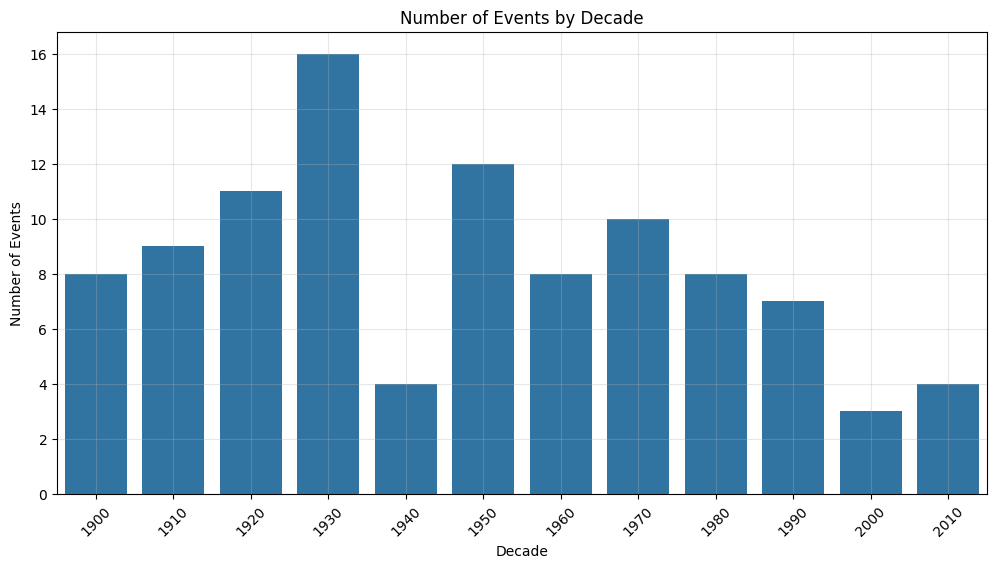

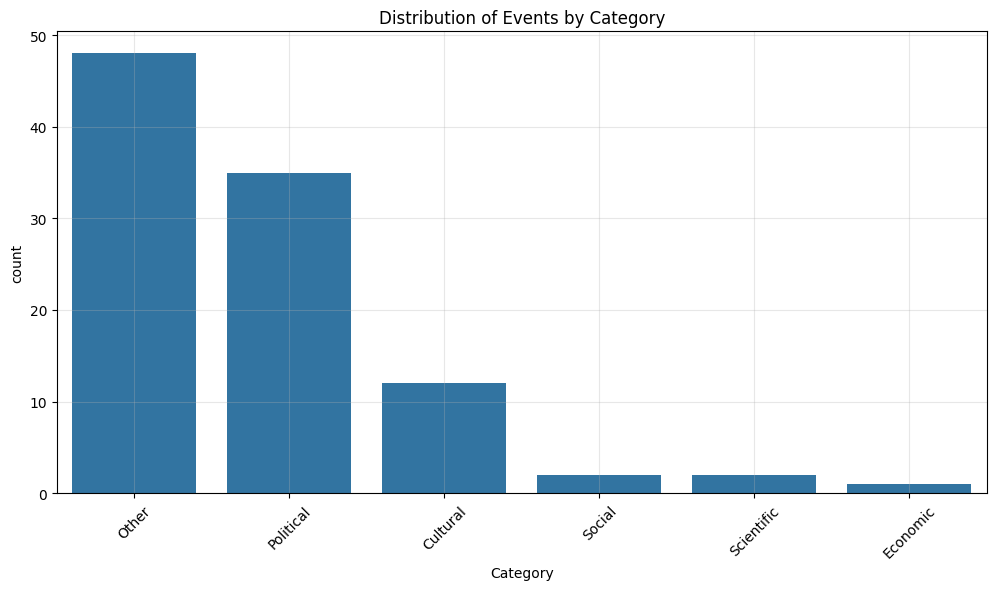

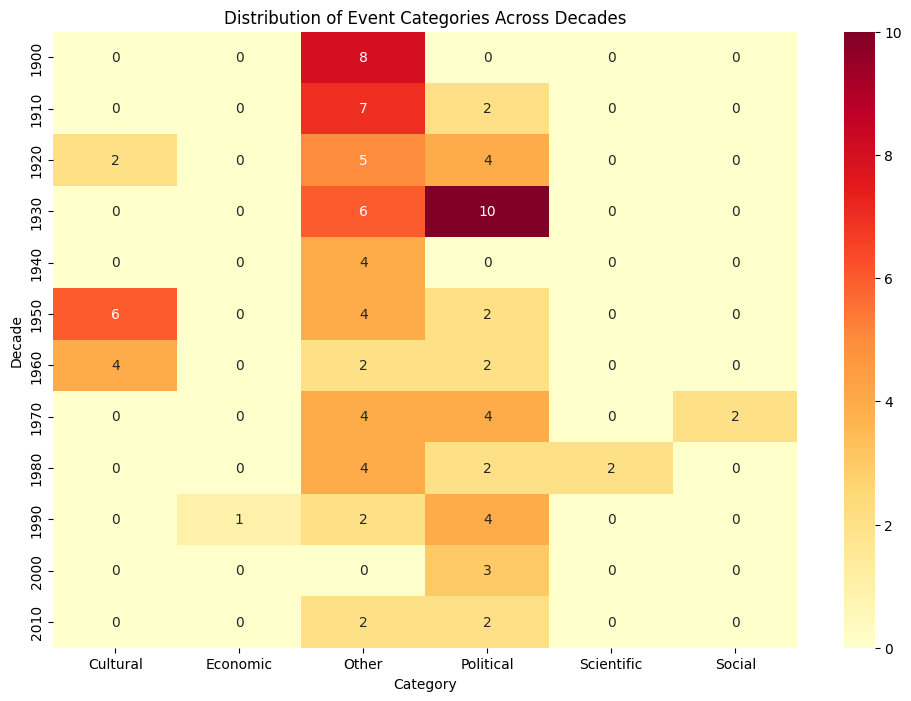

In [7]:
# 1. Events by Decade
plt.figure(figsize=(12, 6))
decade_counts = df['Decade'].value_counts().sort_index()
sns.barplot(x=decade_counts.index.astype(str), y=decade_counts.values)
plt.title('Number of Events by Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

# 2. Events by Category
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Category')
plt.title('Distribution of Events by Category')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

# 3. Heatmap of Categories across Decades
decade_category = pd.crosstab(df['Decade'], df['Category'])
plt.figure(figsize=(12, 8))
sns.heatmap(decade_category, annot=True, cmap='YlOrRd', fmt='d')
plt.title('Distribution of Event Categories Across Decades')
plt.show()


### Interactive Timeline Visualization
Creating an interactive timeline of events using Plotly
    

In [8]:
# Create interactive timeline
fig = px.scatter(df, x='Year', y='Category', color='Category',
                 hover_data=['Event'], title='20th Century Events Timeline')
fig.update_traces(marker=dict(size=12))
fig.update_layout(height=600)
fig.write_html('timeline_visualization.html')
print('Interactive timeline saved as timeline_visualization.html')

Interactive timeline saved as timeline_visualization.html



## Statistical Analysis
Analyzing patterns and trends in the historical events
    

In [9]:
# Basic statistics
print('Events per decade:')
print(df.groupby('Decade')['Event'].count())

print('\nEvents per category:')
print(df.groupby('Category')['Event'].count())

print('\nMost eventful years:')
print(df.groupby('Year')['Event'].count().sort_values(ascending=False).head())

Events per decade:
Decade
1900     8
1910     9
1920    11
1930    16
1940     4
1950    12
1960     8
1970    10
1980     8
1990     7
2000     3
2010     4
Name: Event, dtype: int64

Events per category:
Category
Cultural      12
Economic       1
Other         48
Political     35
Scientific     2
Social         2
Name: Event, dtype: int64

Most eventful years:
Year
1953    6
1930    6
2013    4
1923    4
1979    4
Name: Event, dtype: int64



## Data Export
Saving the processed data for further use
    

In [10]:
# Save to CSV
df.to_csv('20th_century_events_analyzed.csv', index=False)
print('Analysis results saved to 20th_century_events_analyzed.csv')

Analysis results saved to 20th_century_events_analyzed.csv



## Conclusions

This analysis provides several insights about the 20th century:
1. Distribution of events across decades
2. Major categories of historical events
3. Temporal patterns and trends
4. Interactive visualization for exploration

The data and visualizations can be used to:
- Understand the distribution of historical events
- Identify patterns in different types of events
- Explore specific periods of interest
- Compare different decades and categories of events
    